In [2]:
# 15-Sep-2019
# Bo Milvang-Jensen
# Very rudimentary script to read+plot ...

import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

# Read photometry catalogue created by my other script
photfilename = 'F51_out_REMIR_ROS2.fits'
data = fits.getdata(photfilename, 1)

# The photometry catalogue contains aperture photometry in 25 different
# apertures. If we number them 0..24, they correspond to diameters 1..25 arcsec
apno = 10 # This is then 11 arcsec

# The photometry catalogue contains photometry for the AGN plus some more
# objects in the field, in this case the AGN + 6 more objetcs, so 7 in
# total. The AGN is number 1, and the others 2, 3, etc.
# This is seen in the column names, which end in _1, _2, etc.
# E.g. the column MAG_APER_1 contains the aperture magnitudes (for all
# 25 apertures) for the AGN.

# Get the aperture magnitudes
##foo = data['MAG_APER_1'] # has shape e.g. (767, 25), the 25 being the apertures
mag_agn  = data['MAG_APER_1'][:,apno]
mag_ref1 = data['MAG_APER_3'][:,apno] # I have found that _3 is good here
mag_ref2 = data['MAG_APER_4'][:,apno]

# Get the differential magnitudes
delta_mag_agn_ref1 = mag_agn - mag_ref1
delta_mag_ref2_ref1 = mag_ref2 - mag_ref1

# TODO Here I could loop over the filters, subtracting the median

# For simplicity "extract" some arrays from the data
filt = data['filter']
mjd_obs = data['mjd_obs']

# A simple plot of the J band differential mags, with the median subtracted
# Do 'H' and 'K' in the same way
mask = (filt == 'J')
plt.scatter(mjd_obs[mask], delta_mag_agn_ref1[mask]-np.median(delta_mag_agn_ref1[mask]))
plt.title('test')
plt.xlabel('MJD-OBS')
plt.ylabel('delta mag')
plt.show()

<Figure size 640x480 with 1 Axes>

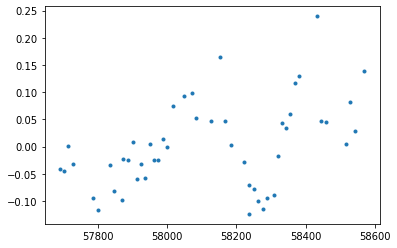

In [5]:
%matplotlib inline
import pymc3 as pm
from pymc3 import  *
import theano.tensor as tt
import numpy as np
import matplotlib.pyplot as plt


x=np.asarray(mjd_obs[mask], dtype=float)
y=np.asarray(delta_mag_agn_ref1[mask]-np.median(delta_mag_agn_ref1[mask]), dtype=float)
data = dict(x=x, y=y)
a=(y[-1]-y[0])/(x[-1]-x[0])
#print(a)
b=y[0]-a*x[0]
#print(b)
std=np.std(y)
#print(std)
#print(x)
#print(y)
plt.plot(x,y,'.')

<MultiTrace: 2 chains, 2000 iterations, 4 variables>


C:\Users\Ejer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


<Figure size 504x504 with 0 Axes>

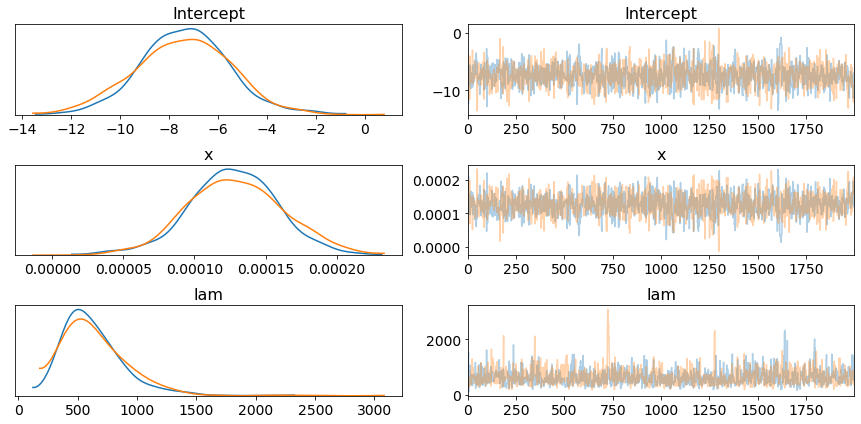

In [8]:
print(trace_robust)
plt.figure(figsize=(7, 7))
traceplot(trace_robust)
plt.tight_layout();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


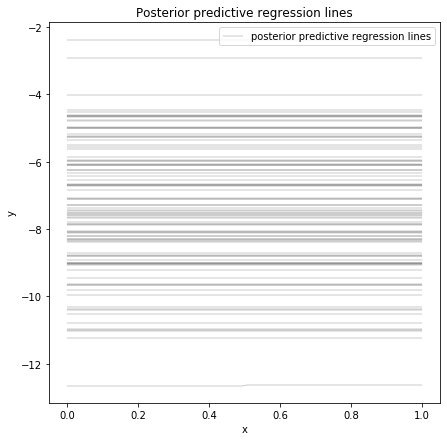

In [10]:
plt.figure(figsize=(7, 7))
#plt.plot(x, y, 'x', label='data')
plots.plot_posterior_predictive_glm(trace_robust, samples=100, 
                                    label='posterior predictive regression lines')
#plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [12]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-7.402630,1.901220,5.228837e-02,-11.234551,-3.704290,1240.800308,1.000517
x,0.000127,0.000033,9.008954e-07,0.000063,0.000193,1240.832061,1.000518
lam,639.544336,277.236968,8.793059e+00,234.668855,1181.222075,933.928471,1.001980
